<a href="https://colab.research.google.com/github/doctorf72/Naya_ML_RegressionProject/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/chaunguynnghunh/sepsis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
import seaborn as sns

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df_train = pd.read_csv('Paitients_Files_Train.csv')
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
df_train.shape

(599, 11)

In [5]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df_train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
df_train.nunique()

ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64

Text(0.5, 1.0, 'Data Distribution')

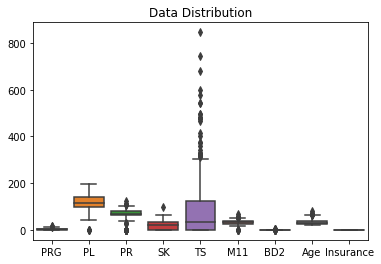

In [8]:
sns.boxplot(data=df_train).set_title('Data Distribution')

Text(0.5, 1.0, 'Data Distribution')

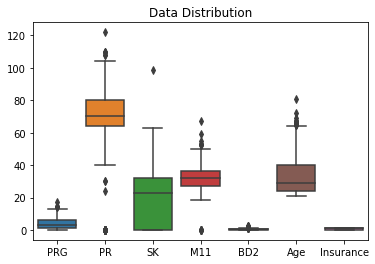

In [9]:
sns.boxplot(data=df_train.drop(['TS','PL'], axis = 1)).set_title('Data Distribution')

Text(0.5, 1.0, 'TS Data Distribution')

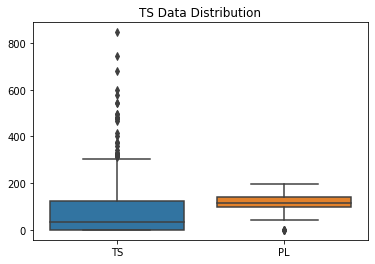

In [10]:
sns.boxplot(data=df_train[['TS','PL']]).set_title('TS Data Distribution')

Text(0.5, 1.0, 'TS and PL features distribution')

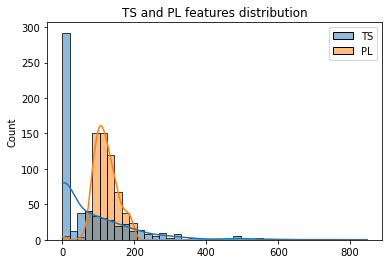

In [11]:
sns.histplot(data=df_train[['TS', 'PL']], kde = True ).set_title("TS and PL features distribution")

Text(0.5, 1.0, 'TS Data Distribution')

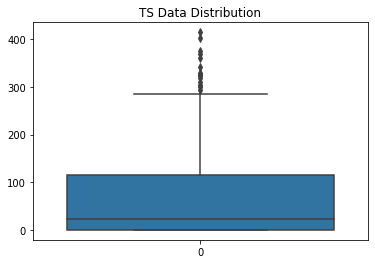

In [12]:
ave = df_train['TS'].mean()
std = df_train['TS'].std()
df_train = df_train.loc[df_train['TS'].between(ave-3*std, ave+3*std)]
sns.boxplot(data=df_train['TS']).set_title('TS Data Distribution')

In [13]:
df_train.shape

(585, 11)

Text(0.5, 1.0, 'PRG Histogramm')

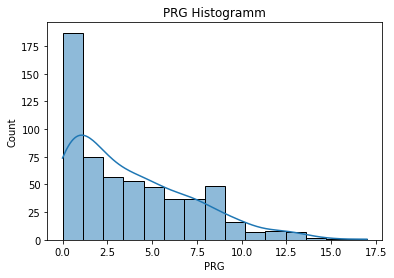

In [14]:
sns.histplot(data=df_train['PRG'], kde = True ).set_title('PRG Histogramm')

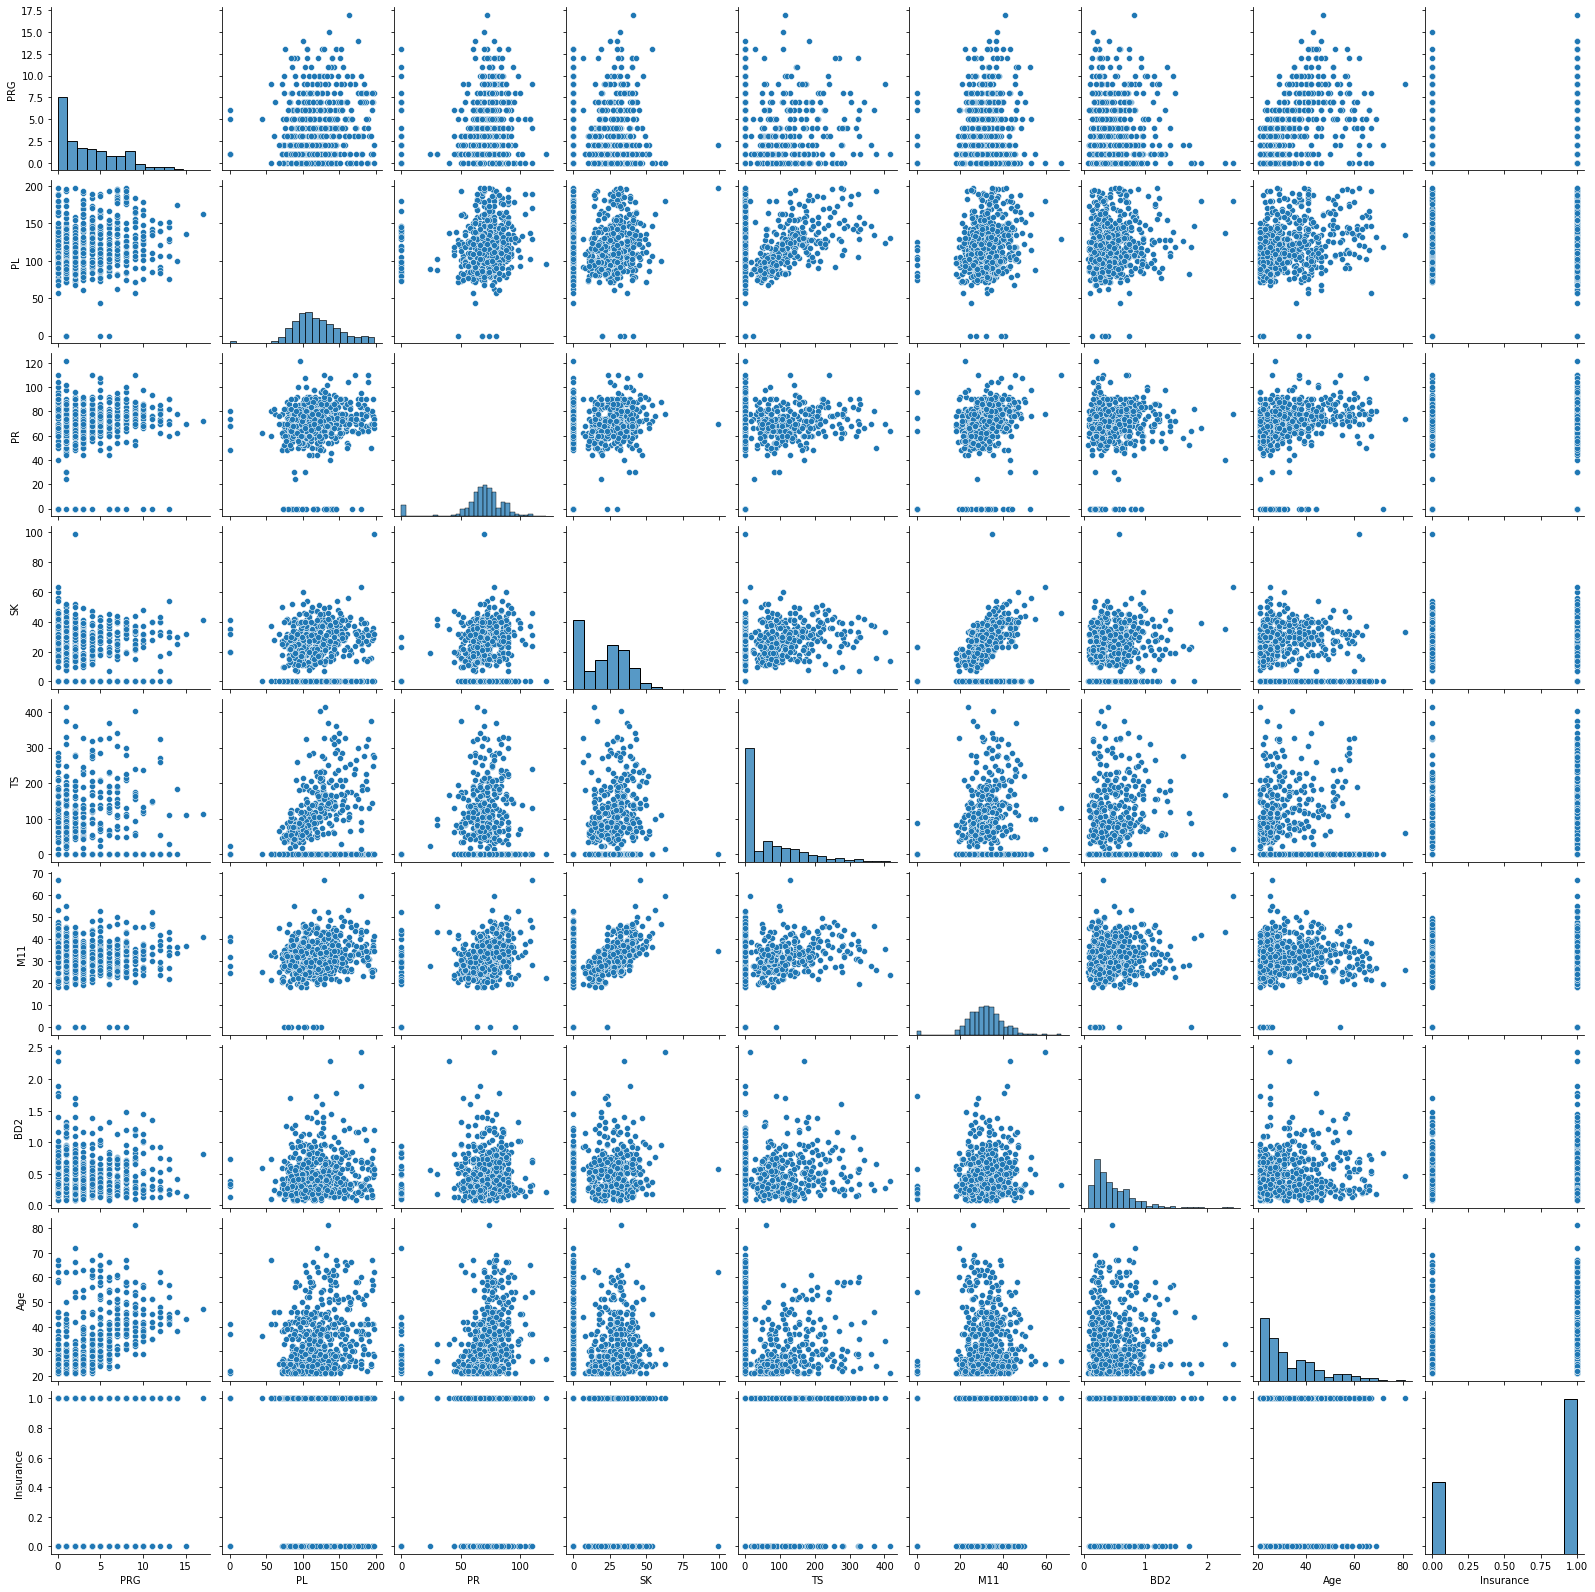

In [15]:
sns.pairplot(df_train)

<Axes: >

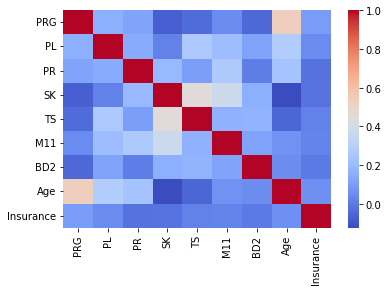

In [16]:
sns.heatmap(df_train.corr(), cmap="coolwarm")

In [17]:
df_train.corr().loc['PRG'].abs().sort_values(ascending = False)

PRG          1.000000
Age          0.533666
PL           0.155409
PR           0.119420
Insurance    0.091934
SK           0.075463
BD2          0.052958
TS           0.045293
M11          0.045079
Name: PRG, dtype: float64

In [18]:
X_train = df_train[['Age']]
y_train = df_train['PRG']

**Model Inspection**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: -1.2511809764547412
The model coefficients are: 0.15316262260073157


Predicting with the model

In [21]:
y_train_pred = model.predict(X_train)

In [22]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,6.406950
1,1,3.496860
2,8,3.650023
3,1,1.965234
4,0,3.803186


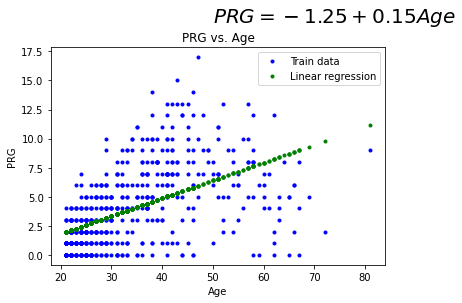

In [23]:
plt.figure()
plt.plot(X_train.Age, y_train, '.b')
plt.plot(X_train.Age, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('Age')
plt.ylabel('PRG')
plt.title('PRG vs. Age')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.2f}+{:.2f}Age$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [24]:
age_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {age_rmse:.2f}")

RMSE = 2.85


**Assess the model**

In [25]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [26]:
df_test['PRG prediction'] = model.predict(df_test[['Age']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,2.731047
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,2.424722
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.037372
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.343698
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,7.019601


In [27]:
age_test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(age_test_rmse))

RMSE = 2.76


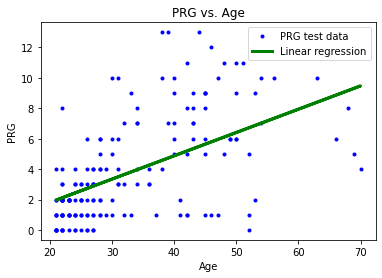

In [28]:
plt.figure()
plt.plot(df_test['Age'],df_test['PRG'],'.b')
plt.plot(df_test['Age'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('Age')
plt.ylabel('PRG')
plt.title('PRG vs. Age')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

In [29]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


**Linear Regression for PL**

In [30]:
X_train = df_train[['PL']]

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: 1.89374492436008
The model coefficients are: 0.01634769497068963


In [33]:
y_train_pred = model.predict(X_train)

In [34]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,4.313204
1,1,3.283299
2,8,4.885373
3,1,3.348690
4,0,4.133379


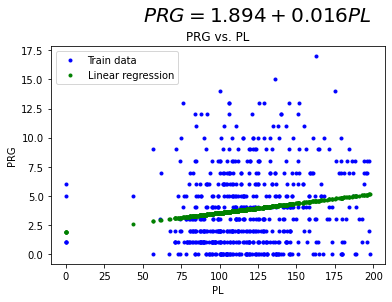

In [35]:
plt.figure()
plt.plot(X_train.PL, y_train, '.b')
plt.plot(X_train.PL, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('PL')
plt.ylabel('PRG')
plt.title('PRG vs. PL')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.3f}+{:.3f}PL$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [36]:
PL_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {PL_rmse:.2f}")

RMSE = 3.33


Assess the model

In [37]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [38]:
df_test['PRG prediction'] = model.predict(df_test[['PL']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.675644
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.659296
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.463124
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.920859
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,4.345899


In [39]:
PL_test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(PL_test_rmse))

RMSE = 3.38


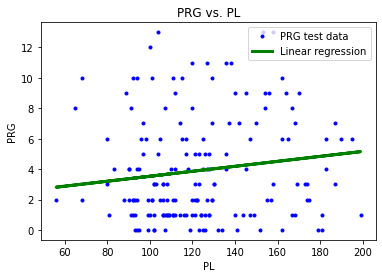

In [40]:
plt.figure()
plt.plot(df_test['PL'],df_test['PRG'],'.b')
plt.plot(df_test['PL'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('PL')
plt.ylabel('PRG')
plt.title('PRG vs. PL')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

**Linear Regression for TS**

In [41]:
X_train = df_train[['TS']]

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
print("The model intercept is: {}".format(model.intercept_))
print("The model coefficients are: {}".format(model.coef_[0]))

The model intercept is: 3.95643603270749
The model coefficients are: -0.0017263424494527743


In [44]:
y_train_pred = model.predict(X_train)

In [45]:
pd.DataFrame({'y_train': y_train, 'y_train_pred': y_train_pred}).head()

,y_train,y_train_pred
0,6,3.956436
1,1,3.956436
2,8,3.956436
3,1,3.794160
4,0,3.666411


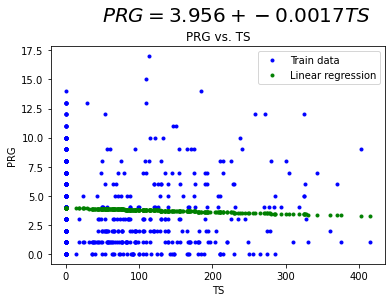

In [46]:
plt.figure()
plt.plot(X_train.TS, y_train, '.b')
plt.plot(X_train.TS, y_train_pred, 
         linewidth=3, color='g', ls='', marker='.')
plt.xlabel('TS')
plt.ylabel('PRG')
plt.title('PRG vs. TS')
plt.legend(['Train data', 'Linear regression'], loc='best')
plt.text(50, 20, '$PRG={:.3f}+{:.4f}TS$'\
         .format(model.intercept_, model.coef_[0]), fontsize=20);

In [47]:
TS_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE = {TS_rmse:.2f}")

RMSE = 3.37


**Assess the model**

In [48]:
df_test = pd.read_csv('Paitients_Files_Test.csv')
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [49]:
df_test['PRG prediction'] = model.predict(df_test[['TS']])
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.749275
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.956436
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.956436
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.956436
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.738917


In [50]:
TS_test_rmse = np.sqrt(mean_squared_error(df_test['PRG'], df_test['PRG prediction']))
print("RMSE = {:.2f}".format(TS_test_rmse))

RMSE = 3.37


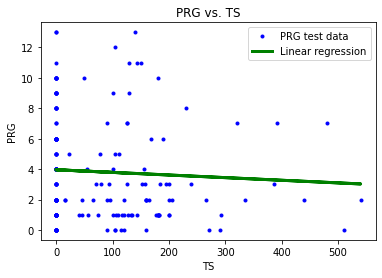

In [51]:
plt.figure()
plt.plot(df_test['TS'],df_test['PRG'],'.b')
plt.plot(df_test['TS'], df_test['PRG prediction'], 
         linewidth=3, color='g')
plt.xlabel('TS')
plt.ylabel('PRG')
plt.title('PRG vs. TS')
plt.legend(['PRG test data', 'Linear regression'], loc='best')

**Multivariate Regression**

In [52]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [53]:
X = df_train.drop(['ID','PRG','Sepssis' ], axis = 1)
X.head()

,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,148,72,35,0,33.6,0.627,50,0
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,1
4,137,40,35,168,43.1,2.288,33,1


In [54]:
y = df_train['PRG']
y.head()

0    6
1    1
2    8
3    1
4    0
Name: PRG, dtype: int64

In [55]:
model_multivar = LinearRegression(fit_intercept=False).fit(X, y)

In [56]:
formula = 'PRG = ' + f'{model_multivar.intercept_:.3f}'
for coef, feature in zip(model_multivar.coef_, X.columns[:8]):
    formula += f'{coef:+.3f}*{feature}'
print(formula)

PRG = 0.000-0.002*PL-0.007*PR+0.000*SK-0.000*TS-0.005*M11-0.955*BD2+0.148*Age+0.318*Insurance


In [57]:
df_train['PRG pred multivariate.'] = model_multivar.predict(X)
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,PRG pred multivariate.
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,5.929171
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,3.557941
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,3.574518
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,2.547530
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,2.312157


In [58]:
rmse = mean_squared_error(y_true=df_train['PRG'], 
                          y_pred=df_train['PRG pred multivariate.'], 
                          squared=False)
print("RMSE = {:.2f}".format(rmse))

RMSE = 2.84


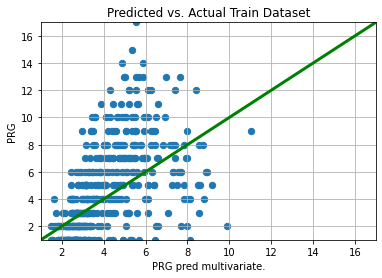

In [59]:
ax = df_train.plot('PRG pred multivariate.','PRG',
                     kind='scatter', s=40,
                     xlim=[1, 17], ylim=[1, 17],
                     title='Predicted vs. Actual Train Dataset',
                   grid = True)
ax.plot(np.linspace(1, 17, 2), np.linspace(1, 17, 2),
        linewidth=3, color='g')

In [60]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.749275
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.956436
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.956436
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.956436
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.738917


In [61]:
X = df_test.drop(['ID','PRG','PRG prediction'], axis = 1)
X.head()

,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,109,38,18,120,23.1,0.407,26,1
1,108,88,19,0,27.1,0.400,24,1
2,96,0,0,0,23.7,0.190,28,1
3,124,74,36,0,27.8,0.100,30,1
4,150,78,29,126,35.2,0.692,54,0


In [62]:
df_test['PRG pred multivariate.'] = model_multivar.predict(X)
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,PRG prediction,PRG pred multivariate.
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1,3.749275,3.228151
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1,3.956436,2.606223
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1,3.956436,4.003525
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1,3.956436,3.848585
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0,3.738917,6.392928


In [63]:
rmse = mean_squared_error(y_true=df_test['PRG'], 
                          y_pred=df_test['PRG pred multivariate.'], 
                          squared=False)
print("RMSE = {:.2f}".format(rmse))

RMSE = 2.80


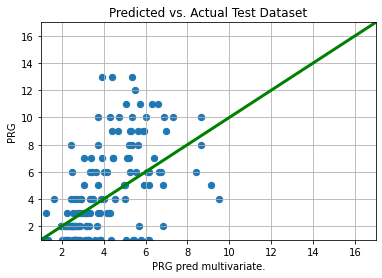

In [64]:
ax = df_test.plot('PRG pred multivariate.','PRG',
                     kind='scatter', s=40,
                     xlim=[1, 17], ylim=[1, 17],
                     title='Predicted vs. Actual Test Dataset',
                  grid = True)
ax.plot(np.linspace(1, 17, 2), np.linspace(1, 17, 2),
        linewidth=3, color='g')